In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from plothelpers import *
from LateralInhibitionNamingGame import *
from Analyzers import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Demo runs
results = {}
us, ts, ss = repeat_simulation(LateralInhibitionNGSimulation, 1, 
                   Agent=LateralInhibitionNGAgent, Analyzer=DetailedAnalyzer, 
                   N=200, T=20000, limit=3, 
                   d_init=1, d_dec=0, d_inc=1, d_inh=1)

results['unique_count'] = np.array(us)
results['total_count'] = np.array(ts)
results['successes'] = np.array(ss)

/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/matplotlib/mathtext.py:851: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


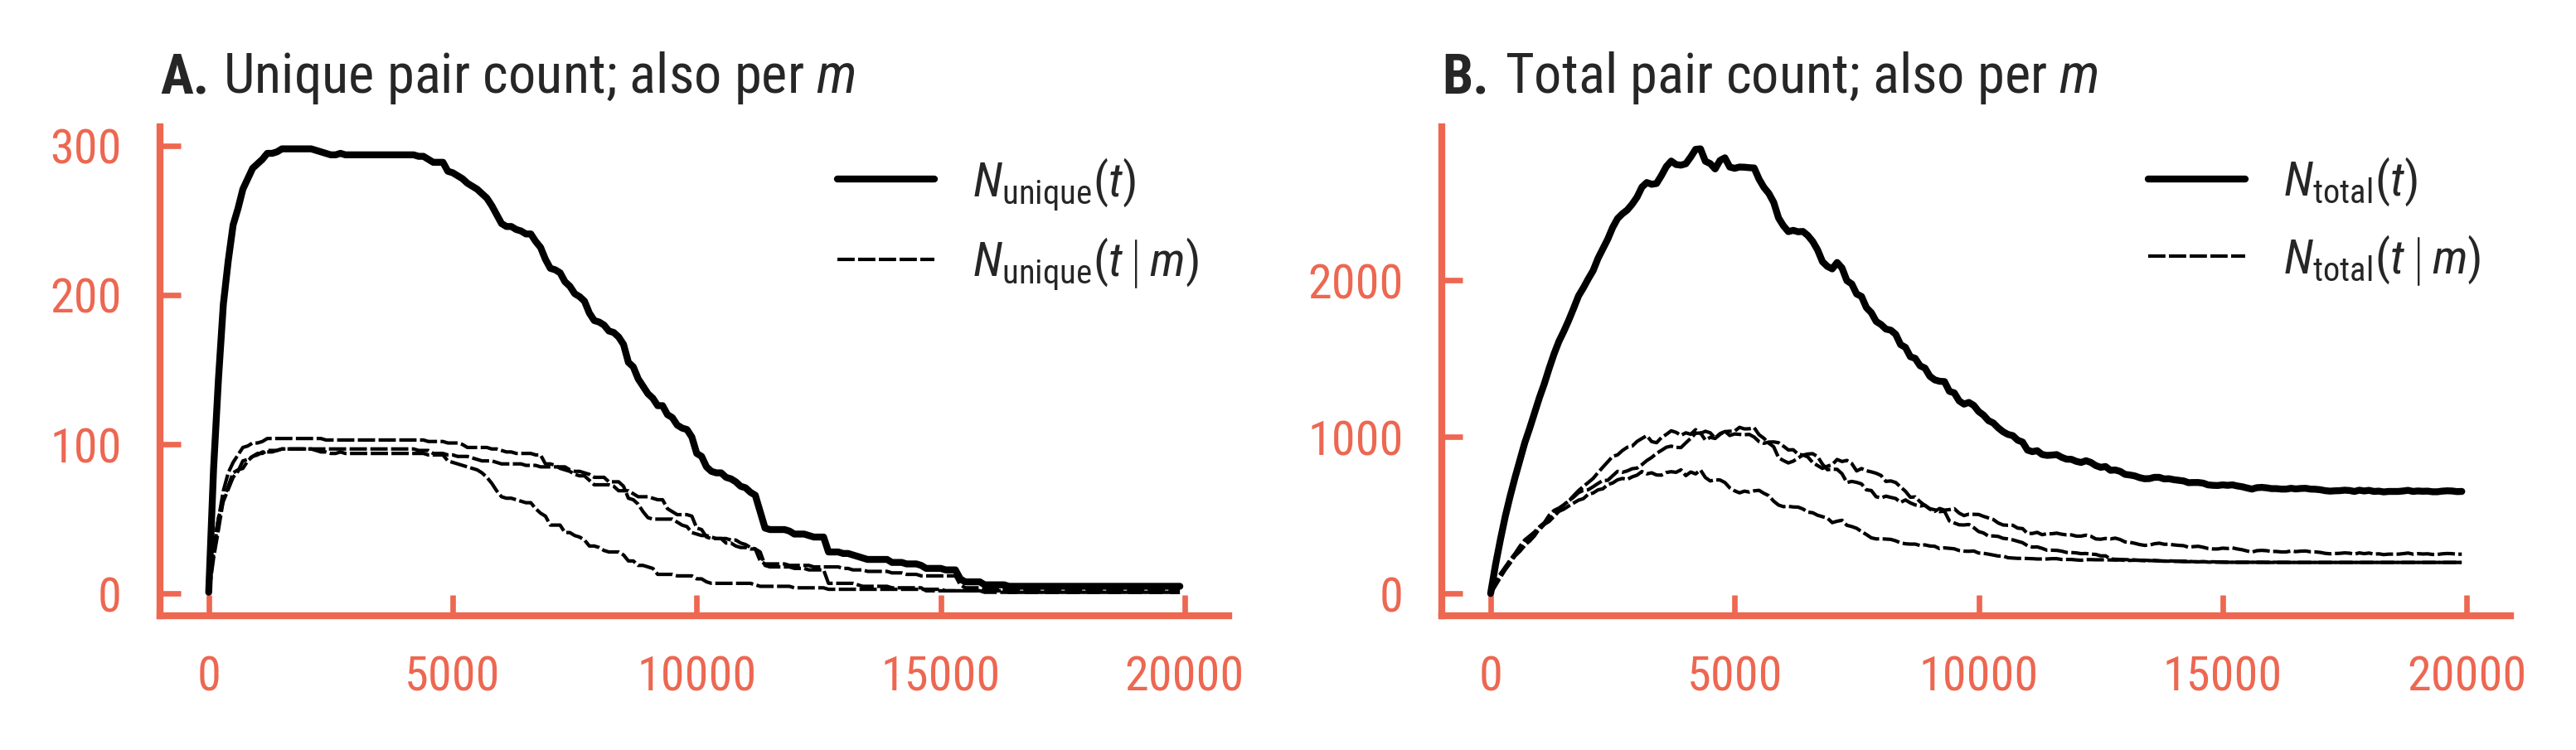

In [3]:
# plot
figure(figsize=cm2inch(12,2.5))
xs = arange(0,20000,100)
ax1 = subplot(121)
plot(xs, results['unique_count'].mean(axis=0), 'k', lw=.5, dashes=(5,1))
plot(xs, results['unique_count'].mean(axis=0).sum(axis=1), 'k',
     label='$N_{\\mathrm{unique}}(t)$')
title('Unique pair count; also per $m$')
plot(0, 0, 'k', lw=.5, dashes=(5,1), label='$N_{\\mathrm{unique}}(t\mid m)$')
legend()

ax2 = subplot(122)
plot(xs, results['total_count'].mean(axis=0).sum(axis=1), 'k', lw=.5, dashes=(5,1))
plot(xs, results['total_count'].mean(axis=0).sum(axis=1).sum(axis=1), 'k',
    label='$N_{\\mathrm{total}}(t)$')
plot(0, 0, 'k', lw=.5, dashes=(5,1), label='$N_{\\mathrm{total}}(t\mid m)$')
title('Total pair count; also per $m$')
legend()

restyle_title(ax1, ax2)
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)

savefig('FIG07-mw-naming-game.pdf', bbox_inches='tight')
copyfig('FIG07-mw-naming-game.pdf')